In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv("CC GENERAL.csv")
df.head(3)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.0,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12


In [4]:
missing_values = df.isnull().sum()

missing_values = missing_values[missing_values > 0]
print(missing_values)

CREDIT_LIMIT          1
MINIMUM_PAYMENTS    313
dtype: int64


In [5]:
object_columns = df.dtypes[df.dtypes == 'object']
object_columns

CUST_ID    object
dtype: object

In [6]:
filtered_df = df[(df['MINIMUM_PAYMENTS'].isna())]
filtered_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12
45,C10047,2242.311686,1.000000,437.00,97.00,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12
47,C10049,3910.111237,1.000000,0.00,0.00,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12
54,C10056,6.660517,0.636364,310.00,0.00,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
55,C10057,1311.995984,1.000000,1283.90,1283.90,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8919,C19160,14.524779,0.333333,152.00,152.00,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,1500.0,0.000000,NaN,0.0,6
8929,C19170,371.527312,0.333333,0.00,0.00,0.0,1465.407927,0.000000,0.000000,0.000000,0.166667,5,0,1500.0,0.000000,NaN,0.0,6
8935,C19176,183.817004,1.000000,465.90,0.00,465.9,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1500.0,0.000000,NaN,0.0,6
8944,C19185,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.0,6


In [7]:
filtered_df = df[(df['MINIMUM_PAYMENTS'].isna()) & (df['PAYMENTS'] == 0)][['PAYMENTS', 'MINIMUM_PAYMENTS']]
filtered_df

,PAYMENTS,MINIMUM_PAYMENTS
3,0.0,NaN
45,0.0,NaN
47,0.0,NaN
55,0.0,NaN
56,0.0,NaN
...,...,...
8854,0.0,NaN
8919,0.0,NaN
8929,0.0,NaN
8935,0.0,NaN


In [8]:
df.loc[(df['MINIMUM_PAYMENTS'].isna()) & (df['PAYMENTS'] == 0), 'MINIMUM_PAYMENTS'] = 0

In [9]:
missing_values = df.isnull().sum()

missing_values = missing_values[missing_values > 0]
print(missing_values)

CREDIT_LIMIT         1
MINIMUM_PAYMENTS    73
dtype: int64


In [10]:
a_df = df.drop("CUST_ID", axis=1)

In [11]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(a_df)

In [12]:
df_missing = a_df[a_df['MINIMUM_PAYMENTS'].isna()]
df_no_missing = a_df.dropna(subset=['MINIMUM_PAYMENTS'])

In [13]:
X = df_no_missing.drop("MINIMUM_PAYMENTS",axis=1)
y = df_no_missing['MINIMUM_PAYMENTS']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Test Set MSE:", mean_squared_error(y_test, y_pred))

Test Set MSE: 4696554.940273405


In [16]:
X_missing = df_missing.drop("MINIMUM_PAYMENTS",axis=1)
df_missing['MINIMUM_PAYMENTS'] = model.predict(X_missing)

/var/folders/gw/67gm5hlx0gscp4nvgpv5lns80000gn/T/ipykernel_42220/316530296.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_missing['MINIMUM_PAYMENTS'] = model.predict(X_missing)


In [17]:
df.update(df_missing)

In [18]:
mean_value2 = df['CREDIT_LIMIT'].mean()
df['CREDIT_LIMIT'].fillna(mean_value2, inplace=True)

/var/folders/gw/67gm5hlx0gscp4nvgpv5lns80000gn/T/ipykernel_42220/547989216.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CREDIT_LIMIT'].fillna(mean_value2, inplace=True)


In [19]:
X = df.drop("CUST_ID",axis=1)

/var/folders/gw/67gm5hlx0gscp4nvgpv5lns80000gn/T/ipykernel_42220/1129496873.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'TENURE', y = 'CREDIT_LIMIT', data = df,palette='Pastel1')


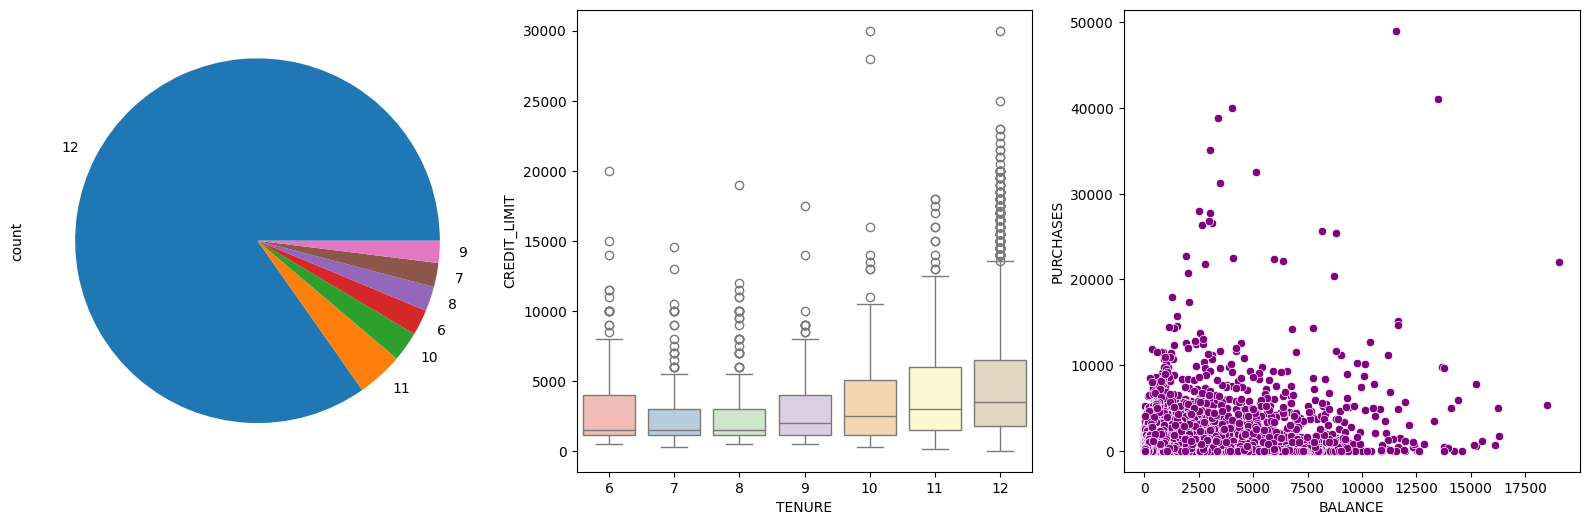

In [20]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
df_v=df['TENURE'].value_counts()
plt.pie = df_v.plot.pie(y='TENURE')
plt.subplot(1,3,2)
sns.boxplot(x = 'TENURE', y = 'CREDIT_LIMIT', data = df,palette='Pastel1')
plt.subplot(1,3,3)
sns.scatterplot(x='BALANCE', y='PURCHASES', data=df,color='purple')
plt.show()

<Axes: >

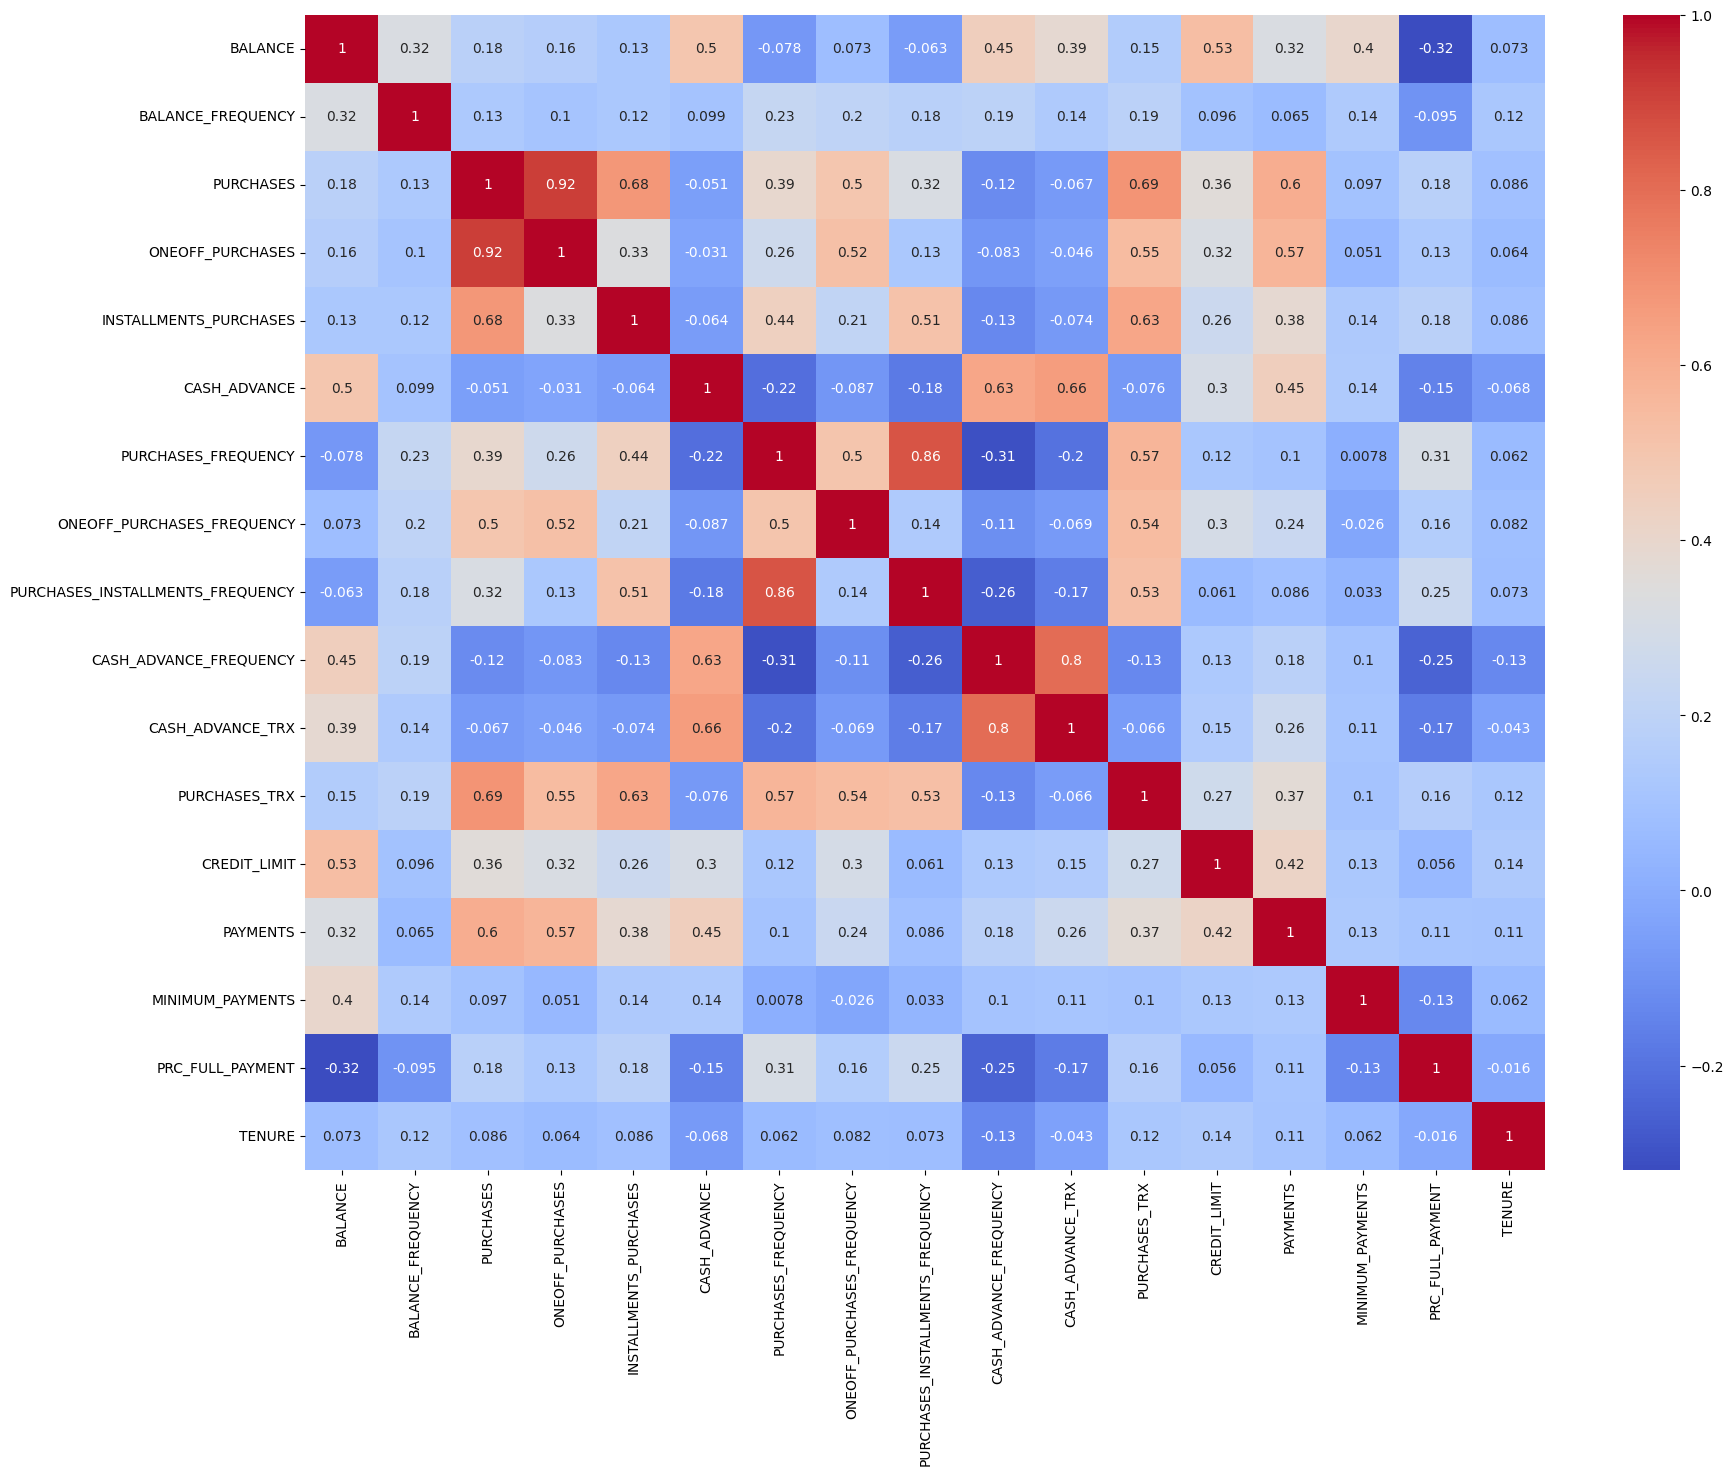

In [21]:
plt.subplots(figsize=(20,15))
sns.heatmap(X.corr(),annot = True,cmap='coolwarm')

In [22]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)

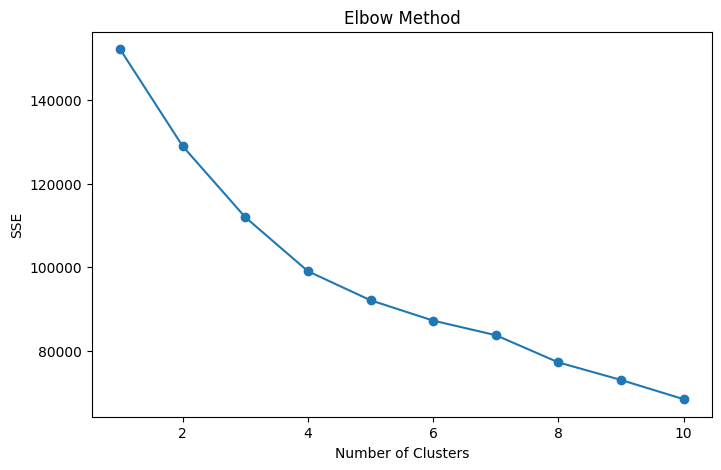

In [27]:
k_values = range(1, 11)
sse = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

In [24]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(data_scaled)

df['Cluster'] = kmeans.labels_

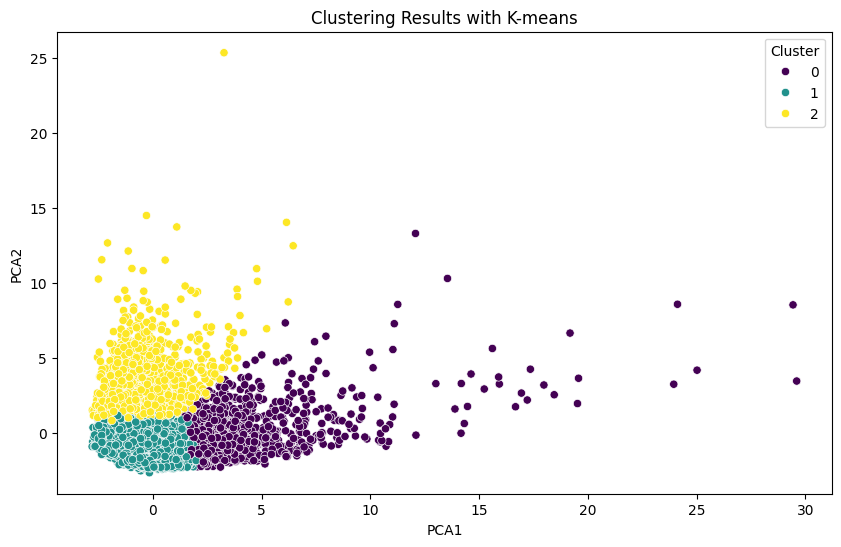

In [25]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

df['PCA1'] = data_pca[:, 0]
df['PCA2'] = data_pca[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='viridis')
plt.title('Clustering Results with K-means')
plt.show()